# Linear Regression
Used to predict quantitative (numerical) response.
+ Can we determine if a relationship exists between predictors and response?
+ How strong is this relationship?
+ Which predictors are related to response?
+ How accurate are predictions once model is fit?
+ Is a linear model appropriate?
+ Are there interaction effects?

## Simple Linear Regression (SLR)
Technically this means one predictor is linearly related to the response.
	$$ Y = \beta_0 +  \beta_1 X + \epsilon$$

There are two unknown constants that we need to estimate, the intercept $\beta_0$ and the slope, $\beta_1$. Also called coefficients or parameters. 
	
Once they are estimated, the estimated fit becomes 
	$$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

There are various ways of estimating the coefficients. The most common approach is via the least squares technique.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# directory name is not case sensitive
adv = pd.read_csv('data/advertising.csv')
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


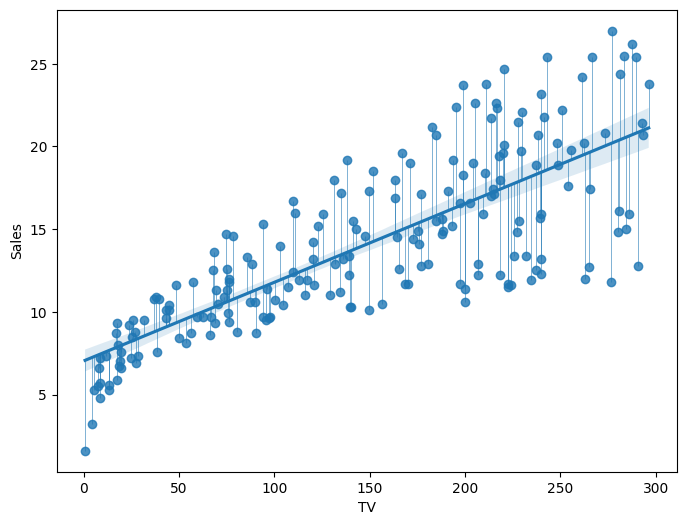

In [ ]:
# fit linear regression model using numpy
fit = np.polyfit(adv['TV'], adv['Sales'], deg=1)

# fit[0] is the slope, fit[1] is the intercept
# y = mx + b
y_hat = fit[1] + adv['TV'] * fit[0]

plt.figure(figsize=(8, 6))
sns.regplot(x='TV', y='Sales', data=adv)
plt.vlines(adv['TV'], y_hat, adv['Sales'], lw = .4);

In [8]:
np.polyfit?

Signature:       np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Call signature:  np.polyfit(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function polyfit at 0x000002B87EAC2DE0>
File:            c:\users\user\appdata\local\programs\python\python313\lib\site-packages\numpy\lib\_polynomial_impl.py
Docstring:      
Least squares polynomial fit.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
method is recommended for new code as it is more stable numerically. See

In [9]:
fit

array([0.04753664, 7.03259355])

### Assessing the Accuracy of the Coefficient Estimates
The theoretical best linear relationship can be defined as: 
	$$Y = \beta_0 + \beta_1 X + \epsilon$$

This **population regression line** will never be known in practice and remain unobserved unless it came from simulated data.

**Unbiased** - An estimator that doesn't systematically over or underestimate the value of the parameter it is estimating	

**How much will the linear regression line expect to vary from sample to sample?**

In the case of estimating a sample mean $\hat{\mu}$ from a number of points $n$, we get that the $Var(\hat{\mu}) = \frac{\sigma^2}{n}$ where $\sigma$ is the standard distribution of the original set of $n$ points. 

The square root of this value is called the **standard error** and gives us a rough idea of how much the estimator will change from sample to sample.
The standard errors of $\beta_0$ and $\beta_1$ are
	$$	SE(\hat{\beta}_0)^2 = \sigma^2 \left[\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n{\left(x_i - \bar{x} \right)^2}} \right] $$
	$$	SE(\hat{\beta}_1)^2 = \frac{\sigma^2}{\sum_{i=1}^n{\left(x_i - \bar{x} \right)^2}} $$
    
Knowing how to derive our standard error and assuming the errors are Gaussian we can generate a **confidence interval** based on a $t$-distribution. 
For instance, approximately 95\% of all samples will be contained in the following interval: $$\beta_1 \pm 1.96 \cdot SE(\beta_1)$$

If the standard error is large and the estimated value small then the estimator might not be significantly different than 0, meaning it statistically is insignificant. To test significance a hypothesis test can be done on any of the predictors. The hypothesis test is usually done to test whether the predictor is different than 0. 

The null hypothesis 
	$$H_0: \beta_1 = 0 $$
is tested against the alternative
$$H_a: \beta_1 \ne 0 $$

To test this we find out how many standard errors our parameter is away from 0. 
	$$t = \frac{\hat{\beta_1}}{SE(\hat{\beta_1})}$$

The $t$-distribution is then used to determine the percentage of time that a random value would fall beyond this t-statistic. This percentage is called the **$p$-value** and used as a measure of how extreme the results of your data are. 
The smaller the $p$-value the more extreme the results and the more likely they did not come from randomness.

### Using the statsmodels api
The excellent [statsmodels library](http://statsmodels.sourceforge.net/) integrates neatly with the pandas DataFrame to do statistical analysis. Some simple 

In [11]:
import statsmodels.formula.api as smf

In [12]:
results1 = smf.ols('Sales ~ TV', data=adv).fit()

In [13]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           1.47e-42
Time:                        12:03:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Simple linear regression with newspaper
results2 = smf.ols('Sales ~ Newspaper', data=adv).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sat, 29 Mar 2025   Prob (F-statistic):            0.00115
Time:                        12:17:56   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results3 = smf.ols('Sales ~ Radio', data=adv).fit()
results3.summary()

# Multiple Regression
Instead of running a simple linear model for each predictor, a model can be built that incorporates all of the predictors. 

The MLR model is
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon$$

A few important questions in MLR:
1. Is at least one of the predictors $X_1,X_2, \ldots, X_p$ useful in predicting the response?
2. Do all the predictors help to explain $Y$, or is only a subset of the predictors useful?
3. How well does the model fit the data? **Use R$^2$ or RSE**

4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction? **Fit into the model. Use PI**

### A1: Test the hypothesis 
$$H_0 : \beta_0 = \beta_1 = \beta_2 = \cdots = \beta_p =0$$
vs

$$H_a : \textrm{at least one } \beta_j \neq 0$$

An F test is performed to test for significance.
$$ F = \frac{(SST - SSE)/p}{SSE / (n - p - 1)}$$ 

or just use the P-value


In [ ]:
results = smf.ols('Sales ~ TV + Newspaper + Radio', data=adv).fit()
results.summary()

In [ ]:
# Newspaper is least highly correlated with Sales
# Its relatively high correlation to Radio could be the reason it was significant on its own and not
# when Radio was also in the model
adv.corr()

In [ ]:
results = smf.ols('Sales ~ TV + Radio', data=adv).fit()
results.summary()

### A2: Selecting a subset of a model
In the above model, Newspaper does not appear to have a relationship with sales and hence would be a good candidate to drop from our model. But if the number of predictors were more, it might be troubling to manually fit many models and hand-select which variables to include in the model. Forward, backward and mixed selection processes can be used to find a better model. All of these selection models make their variable selection based on some statistic - AIC, BIC, Mallows CP, Adjusted R-squared

* Forward - starts with an empty model and adds one variable at a time until the statistic is maximized
* Backward - starts with a full model and removes one variable at a time
* Mixed - starts empty and either removes or adds a variable at each step

# Categorical predictor variables
Variables that are non-numeric or are numerical but represent categories are called categorical variables. Also called qualitative or factor variables. 


In [ ]:
credit = pd.read_csv('data/Credit.csv')
credit

In [ ]:
credit['Female'] = (credit.Gender == 'Female').astype(int)

In [ ]:
credit.head()

In [ ]:
results = smf.ols('Balance ~ Female', data=credit).fit()
results.summary()

In [ ]:
# same thing
credit[credit['Female'] == 0]['Balance'].mean(), credit[credit['Female'] == 1]['Balance'].mean()

In [ ]:
results = smf.ols('Balance ~ Female + Age + Income', data=credit).fit()
results.summary()

# The broken assumptions of a linear model
There are several assumptions that are used when fitting a linear model. 
* The errors are normally distributed and have constant variance
* The errors are not correlated with one another
* The predictor variables are independent. An increase in one won't result in an increase in another
* The change in response for a one unit increase in X is the same no matter what the value of X

# Challenging the linearity constraint through interaction effects
In a linear regression with no interaction effects (no two predictors are multiplied together) and the assumption is that an increase in one unit in one variable will not have any effect on another variable. In many real world problems an increase in one variable might change the impact that another variable has on the response. To capture this in multiple regression, we multiply the predictors together.

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2$

In [ ]:
# interaction model
results = smf.ols('Sales ~ TV + Radio + TV * Radio', data=adv).fit()
results.summary()

# Polynomial Regression is Still Linear
Despite the fact that the regression line can be visibly non-linear the squaring predictor variables still means we are doing linear regression. The requirements for a regression to be 'linear' is to have it linear in the parameters. Heres a good link discussing the difference between linear and non-linear regression. http://blog.minitab.com/blog/adventures-in-statistics/what-is-the-difference-between-linear-and-nonlinear-equations-in-regression-analysis

In [ ]:
# Nonlinearity of data
resid = adv['Sales'] - results.predict(adv)

In [ ]:
# Looks like a non-random shape. data appears slightly non-linear though not too bad
plt.figure(figsize=(12,10))
plt.scatter(results.predict(adv), resid)
plt.ylim(-2, 2);

# Lab
In the book, the lab focuses on performing a linear regression on the Boston dataset. We will do so using seaborn, statsmodels and scikit learn

In [ ]:
boston = pd.read_csv('data/boston.csv')
boston.head(10)

In [ ]:
sns.regplot(x='lstat', y='medv', data=boston);

In [ ]:
# statsmodels
results = smf.ols('medv ~ lstat', data=boston).fit()
results.summary()

In [ ]:
# look at residuals
# Yikes. lots of nonlinearity. Need a different model
plt.scatter(results.fittedvalues, results.resid);

In [ ]:
# Get all columns. No easy way to do this like in R
# Mostly highly significant variables
string_cols = ' + '.join(boston.columns[:-1])
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

In [ ]:
# remove age
string_cols = ' + '.join(boston.columns[:-1].difference(['age']))
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

In [ ]:
# Interaction
results = smf.ols('medv ~ lstat * age', data=boston).fit()
results.summary()

In [ ]:
# Interaction
results = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()
results.summary()

In [ ]:
from statsmodels.stats.anova import anova_lm

In [ ]:
results1 = smf.ols('medv ~ lstat', data=boston).fit()
results2 = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()

anova_lm(results1, results2)

In [ ]:
anova_lm?

In [ ]:
# Manually compute F
(results1.ssr - results2.ssr) / (results2.ssr / results2.df_resid)

In [ ]:
anova_lm(results1)

In [ ]:
results1.summary()

In [ ]:
carseats = pd.read_csv('data/carseats.csv')
carseats.head()

In [ ]:
results = smf.ols('Sales ~ ShelveLoc + Price + Urban', data=carseats).fit()
results.summary()

# Exercises

# 1
There are 3 different null hypotheses for each of TV, Radio and Newspaper each testing whether there is a relationship from that variable to Sales given that the other two variables are held constant. From this model we can reject the null hypotheses that both TV and Radio have no correspondence with sales. We fail to reject the null hypotheses that Newspaper advertising is related to Sales.

# 2
KNN classification predicts as the category who has the highest frequency among it's k nearest neighbors. KNN regression predicts the mean of its nearest K neighbors.

# 3
a) iii is correct. Males will earn more than females GPA is high enough. Higher than 3.5 to be exact to wipe away the female advantage.  
b) 50 + (20 * 4) + (.07 * 110) + (35 * 1) + (.01 * 110 * 4)  - (10 * 1 * 4) = 137.1  
c) False, it all comes down to the standard error of the coefficient to determine significance. It could very well be the most significant factor.

# 4
a) For training data, the RSS always decreases as model complexity increases so the cubic model will have lower RSS.  
b) For test data, the RSS for the linear model should do better as the cubic model will have fit noise and the true model is linear.  
c) Cubic model. Same answer as a)  
d) This would be impossible to know. It could go both ways as the true model is not known. Must compute RSS on test data in this case

# 5
Combining the first equation $\hat{y_i} = x_i\hat{\beta}$ with (3.38) we get $$\hat{y_i} = \frac{x_i\sum\limits_{k=1}^n x_k y_k}{\sum\limits_{j=1}^nx_j^2}$$

The $x_i$ outside of the summation is a constant and be distributed inside the summation. $$\hat{y_i} = \sum\limits_{k=1}^n (\frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2})y_k$$

$a_i$ is everything between the parentheses. $$a_i = \frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2}$$

# 6
Just rearrange the second equation in 3.4 and you have the equality 
# 7
See image below

In [ ]:
from IPython.display import Image

In [ ]:
Image('images/Chapter 3 - 7 proof.jpg')

# 8

In [ ]:
auto = pd.read_csv('data/auto.csv')
auto.head()

In [ ]:
results = smf.ols('mpg ~ horsepower', data=auto).fit()
results.summary()

i) Yes there is strong evidence of a relationship between mpg and horsepower  
ii) Just from the summary it is very strong as the t-statistic is -24 though there is still lots of variation left in the model with an r-squared of .6  
iii) negative  
iv) 

In [ ]:
results.conf_int()

In [ ]:
results.params['Intercept'] + results.params['horsepower'] * 98

In [ ]:
results.conf_int()

In [ ]:
results.bse

In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats

In [ ]:
st, data, ss2 = summary_table(results, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

# wls cinv
prstd, iv_l, iv_u = wls_prediction_std(results)

# plot OLS
cil, = plt.plot(auto['horsepower'], predict_ci_low, 'r--', lw=1, alpha=0.5)
ciu, = plt.plot(auto['horsepower'], predict_ci_upp, 'r--', lw=1, alpha=0.5)
mcil, = plt.plot(auto['horsepower'], predict_mean_ci_low, 'b--', lw=1, alpha=0.5)
mciu, = plt.plot(auto['horsepower'], predict_mean_ci_upp, 'b--', lw=1, alpha=0.5)


plt.scatter(auto['horsepower'], auto['mpg']);

In [ ]:
# create function to compute confidence or prediction interval given an x value
def create_interval(ols_result, interval_type, alpha, x_values, conf_x):
    if interval_type == 'confidence':
        add_one = 0
    elif interval_type == 'prediction':
        add_one = 1
    else:
        print("Choose interval_type as confidence or prediction")
        return
    n = len(x_values)
    t_value = stats.t.ppf(1 - alpha / 2, df = n - 2)
    sy = np.sqrt((ols_result.resid ** 2).sum() / (n - 2))
    numerator = (conf_x - x_values.mean()) ** 2
    denominator = ((x_values - x_values.mean()) ** 2).sum()
    interval = t_value * sy * np.sqrt(add_one + 1 / n + numerator / denominator)
    prediction = results.params[0] + results.params[1] * conf_x
    return (prediction - interval, prediction + interval)

In [ ]:
create_interval(results, 'confidence', .05, auto['horsepower'], 98)

In [ ]:
create_interval(results, 'prediction', .05, auto['horsepower'], 98)

In [ ]:
# Severe problems with the data
plt.scatter(results.fittedvalues, results.resid);

In [ ]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

# 9

In [ ]:
sns.pairplot(auto)

In [ ]:
auto.corr()

In [ ]:
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])
formula

In [ ]:
results = smf.ols(formula, data=auto).fit()
results.summary()

i) There is a clear relationship between predictor and response. F-stat is very high.  
ii) displacement, weight, year, origin are statistically significant    
iii) Its positive, so the higher the year the more the mpg    

### d) look at diagnostic plots

In [ ]:
results_influence = OLSInfluence(results)

In [ ]:
import statsmodels.api as sm

# looks very similar to previous problem
fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax[0, 0].scatter(results.fittedvalues, results.resid)
ax[0, 0].set_ylabel("Raw Residuals")
ax[1, 0].scatter(results.fittedvalues, results_influence.resid_studentized_external)
ax[1, 0].set_ylabel("Studentized Residual")
sm.graphics.qqplot(results.resid / np.sqrt((results.resid ** 2).sum() / 390), line='45', ax=ax[0, 1])
ax[1, 1].scatter(results_influence.resid_studentized_external ** 2, results_influence.influence);

Most residuals fall within 3 standard deviations and the qqplot looks relatively good until the right tail where a few observations are above 3 standard deviations indicating outliers.

In [ ]:
# point 13 has unusually large leverage
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

### e) Add interaction effects

In [ ]:
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])

In [ ]:
from itertools import combinations

In [ ]:
interactions_formula =  " + ".join([comb[0] + " * " + comb[1] for comb in combinations(auto.columns[1:-1], 2)])
interactions_formula

In [ ]:
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])
formula += ' + ' + interactions_formula

In [ ]:
results = smf.ols(formula, data=auto).fit()
results.summary()

After adding all possible (7c2 = 21) interaction combination effects to the model only one of them is significant at the .01 level. Acceleration * origin

In [ ]:
# add displacement squared to model

In [ ]:
formula += ' + np.power(displacement, 2)'
results = smf.ols(formula, data=auto).fit()
results.summary()

In [ ]:
# lots of multicolinearity going on here
results = smf.ols('mpg ~ displacement + origin + np.power(displacement, 2)', data=auto).fit()
results.summary()

In [ ]:
# sqrt of horsepower has higher r-squared than horsepower by itself
results = smf.ols('mpg ~ np.sqrt(horsepower)', data=auto).fit()
results.summary()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.scatter(auto['horsepower'], auto['mpg'])
ax1.set_title("Horsepower vs MPG")
ax2.scatter(np.log(np.log(auto['horsepower'])), auto['mpg'])
ax2.set_title("Log(Log(Horsepower)) vs MPG");

In [ ]:
# R-squared increases a bit more with log-log-horsepower
results = smf.ols('mpg ~ np.log(np.log((horsepower)))', data=auto).fit()
results.summary()

# 10 - Carseats data

In [ ]:
carseats = pd.read_csv('data/carseats.csv')
carseats.head()

In [ ]:
results = smf.ols('Sales ~ Price + Urban + US', data=carseats).fit()
results.summary()

Only US and Price are statistically significant in our model. There is no difference whether someone is living in an urban area or not. Living in the US adds 1.2 to Sales up from 13 for outside of US. For every 1 unit increase in Price a corresponding .05 decrease in sales is seen.

# equations
Ignoring Urban because its not significant.
* In US: $Sales = 14.24 - .055 * Price$
* Not in US: $Sales = 13.04 - .055 * Price$

d) Reject null for US and Price

In [ ]:
# e) smaller model without urban
results = smf.ols('Sales ~ Price + US', data=carseats).fit()
results.summary()

f) Since urban is nearly completely random, there is almost no difference in the two models above. R-squared is low so lots of variance remains in the model  
g) See table

In [ ]:
# Doesn't appear to be outliers
plt.scatter(results.fittedvalues, results.resid);

In [ ]:
# a few high leverage points above .025
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

# 11

In [ ]:
np.random.seed(1)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

In [ ]:
plt.scatter(x, y);

In [ ]:
# No constant. Highly signifcant predictor
results = sm.OLS(y, x).fit()
results.summary()

In [ ]:
# x onto y. Same as above
results = sm.OLS(x, y).fit()
results.summary()

e) The derived equation is symmetric to x and y, meaning you can replace x and y and the equation would be the exact same.

In [ ]:
results = sm.OLS(x, sm.add_constant(y)).fit()
results.summary()

In [ ]:
# F-statistic and t-stat is same with an intercept
results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

# 12
a) Using equation 3.38, the coefficients will be the same when $\sum{y^2} = \sum{x^2}$  
b) Its very difficult to get the exact same coefficients. Any random pairing will do

In [ ]:
# b
np.random.seed(1)
x = np.random.randn(100)
y = x + np.random.randn(100) / 100

In [ ]:
# very close to a perfect line
plt.scatter(x, y)

In [ ]:
np.corrcoef(x, y)

In [ ]:
results = sm.OLS(y, x).fit()
results.summary()

In [ ]:
# coefficients are just a little different
results = sm.OLS(x, y).fit()
results.summary()

In [ ]:
# c) if x and y are the exact same (but in a different order) the coefficients for the model should be the same
x = np.random.randn(100) * 5
y = x.copy()
np.random.shuffle(y)

In [ ]:
# perf
plt.scatter(x, y);

In [ ]:
results = sm.OLS(x, y).fit()
results.summary()

In [ ]:
# Same coefficient!
results = sm.OLS(y, x).fit()
results.summary()

# 13

In [ ]:
x = np.random.randn(100)
eps = np.random.randn(100) * .25
y = -1 + .5 * x + eps # b0 = -1 and b1 = .5

In [ ]:
plt.scatter(x, y);

In [ ]:
# coefficient estimates are very close to actual
results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

In [ ]:
# they are very close to one another
plt.scatter(x, y)
plt.plot(x, -1 + .5 * x, label ='pop')
plt.plot(x, results.params[0] + results.params[1] * x, label = 'fit')
plt.legend();

In [ ]:
results.params

In [ ]:
# x squared is not significant
x2 = np.column_stack((np.ones(100), x, x ** 2))
results = sm.OLS(y, x2).fit()
results.summary()

In [ ]:
# the confidence intervals will shrink/expand with eps

# 14

In [ ]:
np.random.seed(1)
x1 = np.random.rand(100)
x2 = .5 * x1 + np.random.rand(100) / 10
y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)
# regresion coeffs are 2, 2, .3

In [ ]:
# very highly correlated. Only differ by random factor between 0 and .1
np.corrcoef(x1, x2)

In [ ]:
plt.scatter(x1, x2);

In [ ]:
# Surprisingly both variables are not significant
X = np.column_stack((np.ones(100), x1, x2))
results = sm.OLS(y, X).fit()
results.summary()

In [ ]:
X = np.column_stack((np.ones(100), x1))
results = sm.OLS(y, X).fit()
results.summary()

In [ ]:
X = np.column_stack((np.ones(100), x2))
results = sm.OLS(y, X).fit()
results.summary()

Since x1 and x2 are very highly correlated to one another it makes sense that when substituted in a linear model for one another a very similar r-squared would be achieved. The high collinearity is causing havoc with the model when both x1 and x2 are in the model. We know beforehand that each variable has a positive relationship with y and in the first model, x1 is positive and x2 is negative which is an impossibility. The standard errors for each predictor grow because of the collinearity which causes them not to be significant when they are.

In [ ]:
x1_new = np.append(x1, .1)
x2_new = np.append(x2, .8)
y_new = np.append(y, 6)

In [ ]:
X = np.column_stack((y_new, x1_new, x2_new))
df_new = pd.DataFrame(X, columns=['y', 'x1', 'x2'])
results = smf.ols('y ~ x2', data=df_new).fit()
results.summary()

In [ ]:
# correlation goes way down with one point
np.corrcoef(x1_new, x2_new)

In [ ]:
# huge outlier here
plt.scatter(x1_new, x2_new)

In [ ]:
# Not an outlier in terms of residual, but very likely very influential
plt.scatter(results.fittedvalues, results.resid);

In [ ]:
# Yup its unbelievably influential
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

# 15

In [ ]:
# a) simple linear regression for each predictor
boston = pd.read_csv('data/boston.csv')
boston.head()

In [ ]:
# The below prints the confindence interval for each predictor in a simple linear regression
# Nearly all the predictors have 95% confindence bands that don't include 0 meaning they rejecy the null hypothesis
# the only predictors that fails to reject null: chas 
for col in boston.columns[1:]:
    results = smf.ols('crim ~ {}'.format(col), data=boston).fit()
    print(results.conf_int())

In [ ]:
formula = 'crim ~ ' + ' + '.join(boston.columns[1:])
formula

In [ ]:
# All variables in model. Many are not significant now
results = smf.ols(formula, data=boston).fit()
results.summary()

In [ ]:
# all significant predictors
results.tvalues[abs(results.tvalues) > 2]

In [ ]:
# Get all coefficients from multiple reression model
multiple_linear_params = results.params.iloc[1:]

simple_linear_params = pd.Series()
for col in boston.columns[1:]:
    results_slr = smf.ols('crim ~ {}'.format(col), data=boston).fit()
    simple_linear_params = simple_linear_params.append(results_slr.params.loc[[col]])
    
both_models = pd.DataFrame({'simple': simple_linear_params, 'multiple':multiple_linear_params})
both_models

In [ ]:
both_models.plot.scatter('simple', 'multiple')

In [ ]:
# there are several variables raised to the power of 2 or 3 that are showing significance
# but these need to be combined with other variables to assess their actual importance
for col in boston.columns[1:]:
    results = smf.ols('crim ~ {} + np.power({}, 2) + np.power({}, 3)'.format(col, col, col), data=boston).fit()
    print(results.conf_int())